<a href="https://colab.research.google.com/github/GONZALOCACERES2004/DLearning/blob/main/Practica/downloadData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descarga y formatting del CSV de los datos

In [17]:
import cv2
import numpy as np
import pandas as pd
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data = pd.read_csv("/content/drive/MyDrive/DeepLearning/dataset.csv", sep=';')
data = data.dropna(subset=['price'])
data['price']

,price
0,$125.00
1,$135.00
2,$179.00
3,$91.00
4,$86.00
...,...
7194,$83.00
7195,$107.00
7196,$136.00
7197,$83.00


In [20]:
# Eliminamos el signo de dólar y las comas, luego convertimos a float
data['price'] = data['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Verificamos el resultado
data['price']

,price
0,125.0
1,135.0
2,179.0
3,91.0
4,86.0
...,...
7194,83.0
7195,107.0
7196,136.0
7197,83.0


In [21]:
# ¿De qué variables disponemos?
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'ava

## Descarga de imágenes

In [22]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = np.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=np.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

Normalización y conversión en el rango [0, 1]

**RECORDAD SEÑALAR LA COLUMNA ADECUADA**

In [23]:
images, idxs = download_images(data['picture_url'], max_imgs=1000)
images = images.astype("float32") / 255.
images.shape

100%|██████████| 1000/1000 [05:01<00:00,  3.31it/s]


(944, 224, 224, 3)

Filtrado acorde en los demás datos

In [24]:
filtered_data = data.iloc[idxs]
filtered_data

,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,37912471,https://www.airbnb.com/rooms/37912471,20231218233145,2023-12-19,previous scrape,https://a0.muscache.com/pictures/2690a227-2993...,27180387,https://www.airbnb.com/users/show/27180387,Jen,2015-02-03,...,NaN,NaN,NaN,STR-407363,f,1,1,0,0,NaN
996,37968399,https://www.airbnb.com/rooms/37968399,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,272001812,https://www.airbnb.com/users/show/272001812,Antonio,2019-06-28,...,4.93,4.51,4.72,STR-541492,t,4,1,3,0,1.64
997,37968480,https://www.airbnb.com/rooms/37968480,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,272001812,https://www.airbnb.com/users/show/272001812,Antonio,2019-06-28,...,4.93,4.57,4.78,STR-541492,t,4,1,3,0,1.11
998,38018931,https://www.airbnb.com/rooms/38018931,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,224829568,https://www.airbnb.com/users/show/224829568,Sonder (Boston),2018-11-08,...,4.69,5.00,4.44,STR-446104,f,19,12,7,0,1.33


## Guardado de los datos para posterior uso/selección

In [25]:
np.save('images.npy', images)
filtered_data.to_csv('filtered_data.csv', sep=';', index=False)

In [26]:
!cp images.npy /content/drive/MyDrive/DeepLearning/images.npy
!cp filtered_data.csv /content/drive/MyDrive/DeepLearning/filtered_data.csv

!ls -lah images* filtered*  # Comprobación

-rw-r--r-- 1 root root 1011K Oct 26 06:16 filtered_data.csv
-rw-r--r-- 1 root root  543M Oct 26 06:16 images.npy


In [27]:
# Comprobamos a abrirlos de nuevo
saved_data = pd.read_csv("/content/drive/MyDrive/DeepLearning/filtered_data.csv", sep=';')
saved_imgs = np.load("/content/drive/MyDrive/DeepLearning/images.npy")
saved_data.shape, saved_imgs.shape

((944, 72), (944, 224, 224, 3))

Así, por ejemplo, cargamos y visualizamos la distribución de las etiquetas:

<Axes: >

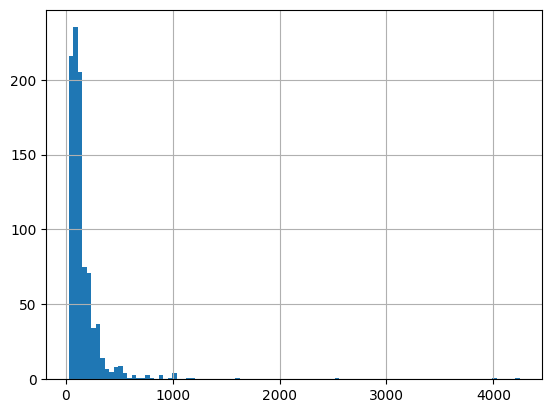

In [28]:
saved_data['price'].hist(bins=100)

Y podemos dividir por porcentajes, para crear clases, como por ejemplo:

In [30]:
saved_data['price'].describe()

,price
count,944.000000
mean,165.615466
std,248.703722
min,26.000000
25%,70.000000
50%,116.500000
75%,180.750000
max,4245.000000


<Axes: >

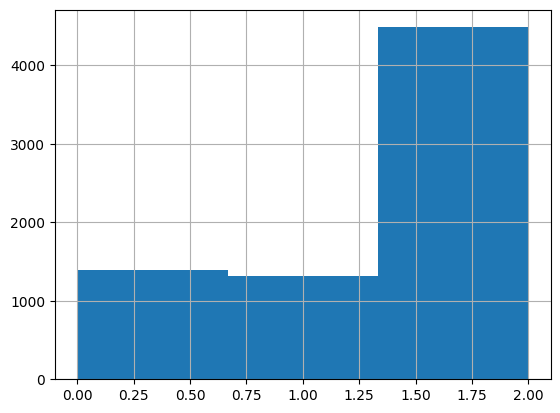

In [31]:
y_class = []
for y in data['price']:
  if y <= 70:
    y_class.append(0) # Rango más barato
  elif 81 < y <= 116:
    y_class.append(1) # Rango intermedio
  else:
    y_class.append(2)
y_class = pd.Series(y_class)
y_class.hist(bins=3)